In [16]:
from circuit_sampling import table, compute_fidelity
from circuit_sampling import DVCircuit

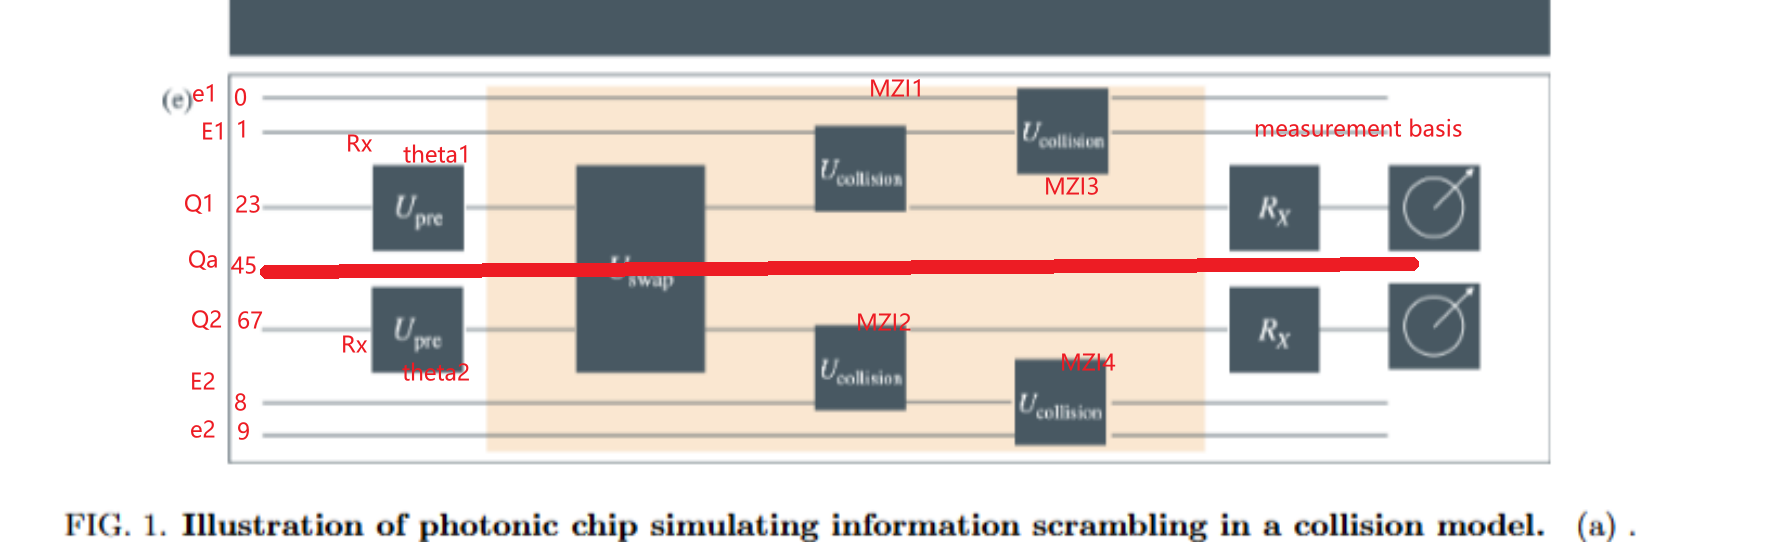

In [17]:
# DVCircuit 生成线路类，ifnoise控制参数是否是准确值

param = {
        'theta1': 1,
        'theta2': 1,
        'MZI1' : [1, 1],
        'MZI2' : [1, 1],
        'MZI3' : [1, 1],
        'MZI4' : [1, 1],
        }

cir_standard = DVCircuit(ifnoise=True,
                         sigma=0.2, 
                         param=param,
                         repeatation=10)
cir_standard.get_circuit().draw('pic/circuit.svg')

In [18]:
# 概率理论值 prob[64可观测量][8种output]
table(cir_standard.prob_all_observable())

,0,1,2,3,4,5,6,7
0,0.040807,0.025802,0.014184,0.074230,0.619006,0.002788,0.215163,0.008021
1,0.040957,0.025652,0.036554,0.051859,0.301100,0.320694,0.121389,0.101795
2,0.064837,0.001771,0.012674,0.075740,0.270527,0.351267,0.151962,0.071222
3,0.040807,0.025802,0.014184,0.074230,0.619006,0.002788,0.215163,0.008021
4,0.027495,0.050016,0.027495,0.050016,0.417085,0.005404,0.417085,0.005404
...,...,...,...,...,...,...,...,...
59,0.003437,0.093780,0.051554,0.006252,0.052136,0.010133,0.782033,0.000676
60,0.040807,0.025802,0.014184,0.074230,0.619006,0.002788,0.215163,0.008021
61,0.040957,0.025652,0.036554,0.051859,0.301100,0.320694,0.121389,0.101795
62,0.064837,0.001771,0.012674,0.075740,0.270527,0.351267,0.151962,0.071222


In [19]:
# 概率采样值 prob[64可观测量][8种output]
table(cir_standard.sampling_all_observable(shots=100000))

,0,1,2,3,4,5,6,7
0,0.040463,0.026117,0.015327,0.073773,0.618547,0.002984,0.215310,0.007479
1,0.041115,0.027062,0.036658,0.049506,0.302578,0.321569,0.123023,0.098490
2,0.061669,0.001607,0.012053,0.075369,0.271142,0.356072,0.148849,0.073239
3,0.038646,0.026503,0.015015,0.074708,0.617600,0.002749,0.216697,0.008082
4,0.028050,0.051548,0.027927,0.048513,0.416034,0.004880,0.417757,0.005290
...,...,...,...,...,...,...,...,...
59,0.003784,0.093687,0.051943,0.006663,0.050751,0.011803,0.780670,0.000699
60,0.042314,0.025749,0.014884,0.074542,0.616999,0.002542,0.214974,0.007995
61,0.040171,0.025382,0.035375,0.049804,0.302502,0.324446,0.118954,0.103366
62,0.064413,0.001758,0.012667,0.077599,0.269000,0.349916,0.153560,0.071086


In [20]:
# 层析结果，可选择使用理论值计算/采样值计算
rho_hat = cir_standard.tomography(if_sampling=False)

In [21]:
import numpy as np
np.trace(rho_hat)

(1+0j)

In [22]:
table(rho_hat)

,0,1,2,3,4,5,6,7
0,0.040807+0.000000j,0.007653-0.031533j,-0.000000+0.024058j,-0.053484-0.012980j,0.153481-0.041267j,0.000262+0.010663j,0.024330+0.090488j,0.018086-0.000445j
1,0.007653+0.031533j,0.025802+0.000000j,-0.018591+0.004512j,0.000000-0.043764j,0.060671+0.110862j,-0.008190+0.002202j,-0.065361+0.035770j,0.003735+0.013892j
2,-0.000000-0.024058j,-0.018591-0.004512j,0.014184+0.000000j,-0.007653+0.031533j,-0.024330-0.090488j,0.006286-0.000155j,0.053349-0.014344j,-0.000262-0.010663j
3,-0.053484+0.012980j,0.000000+0.043764j,-0.007653-0.031533j,0.074230+0.000000j,-0.188039+0.102908j,-0.003735-0.013892j,-0.060671-0.110862j,-0.023563+0.006335j
4,0.153481+0.041267j,0.060671-0.110862j,-0.024330+0.090488j,-0.188039-0.102908j,0.619006+0.000000j,-0.009797+0.040370j,0.000000+0.364948j,0.068473+0.016617j
5,0.000262-0.010663j,-0.008190-0.002202j,0.006286+0.000155j,-0.003735+0.013892j,-0.009797-0.040370j,0.002788+0.000000j,0.023801-0.005776j,-0.000000-0.004729j
6,0.024330-0.090488j,-0.065361-0.035770j,0.053349+0.014344j,-0.060671+0.110862j,0.000000-0.364948j,0.023801+0.005776j,0.215163+0.000000j,0.009797-0.040370j
7,0.018086+0.000445j,0.003735-0.013892j,-0.000262+0.010663j,-0.023563-0.006335j,0.068473-0.016617j,-0.000000+0.004729j,0.009797+0.040370j,0.008021+0.000000j


In [23]:
# 计算三方互信息，必须使用DVCircuit.tomography后使用
cir_standard.mutual_information()[3]

-1.2026607687509738e-07

In [24]:
print(np.linalg.eigvals(rho_hat))  # 检查特征值是否为非负

[ 9.99999994e-01+2.79957590e-17j  6.14833033e-08-1.07857291e-17j
 -5.22867901e-08-4.48555693e-18j  2.23663059e-08-9.20313393e-19j
 -1.92195882e-08-1.09085386e-17j -1.16161471e-08-8.94169211e-18j
  4.40807956e-09+9.04944146e-19j  1.14016885e-09-5.05975883e-19j]


In [25]:
# 层析结果，可选择使用理论值计算/采样值计算
rho_hat_2 = cir_standard.tomography(if_sampling=True, shots=100000)

In [26]:
import numpy as np
np.trace(rho_hat_2)

(1+0j)

In [27]:
table(rho_hat_2)

,0,1,2,3,4,5,6,7
0,0.040366+0.000000j,0.010506-0.033326j,0.000410+0.024030j,-0.052739-0.012682j,0.151021-0.041333j,0.002926+0.010802j,0.024868+0.090331j,0.020533+0.001262j
1,0.010506+0.033326j,0.025980+0.000000j,-0.018445+0.005817j,-0.003576-0.045168j,0.061303+0.109235j,-0.006423+0.002294j,-0.066658+0.037489j,0.005389+0.014365j
2,0.000410-0.024030j,-0.018445-0.005817j,0.016679+0.000000j,-0.009625+0.030486j,-0.026845-0.091345j,0.004213+0.000313j,0.051957-0.016344j,0.000446-0.010221j
3,-0.052739+0.012682j,-0.003576+0.045168j,-0.009625-0.030486j,0.072635+0.000000j,-0.188342+0.103753j,-0.004705-0.017248j,-0.060542-0.112049j,-0.024730+0.006375j
4,0.151021+0.041333j,0.061303-0.109235j,-0.026845+0.091345j,-0.188342-0.103753j,0.618854+0.000000j,-0.010795+0.040972j,0.001365+0.366736j,0.068244+0.014404j
5,0.002926-0.010802j,-0.006423-0.002294j,0.004213-0.000313j,-0.004705+0.017248j,-0.010795-0.040972j,0.001380+0.000000j,0.024053-0.005971j,0.002892-0.004460j
6,0.024868-0.090331j,-0.066658-0.037489j,0.051957+0.016344j,-0.060542+0.112049j,0.001365-0.366736j,0.024053+0.005971j,0.215631+0.000000j,0.009617-0.043413j
7,0.020533-0.001262j,0.005389-0.014365j,0.000446+0.010221j,-0.024730-0.006375j,0.068244-0.014404j,0.002892+0.004460j,0.009617+0.043413j,0.008476+0.000000j


In [28]:
# 计算互信息，必须使用DVCircuit.tomography后使用
cir_standard.mutual_information()[3]

0.01224721568798004

In [29]:
print(np.linalg.eigvals(rho_hat_2))  # 检查特征值是否为非负

[ 1.00180871e+00+2.26021307e-17j  9.50073579e-03-7.58950581e-18j
  5.05468849e-03+3.23324652e-18j -7.39324869e-03+1.81965912e-17j
 -6.09195758e-03+6.67092036e-18j  6.11936284e-04+3.65185938e-18j
 -2.11538278e-03-7.17482219e-18j -1.37547673e-03+6.19927882e-19j]


In [30]:
# 计算保真度，出现>1的情况是因为算出来的密度矩阵非正定
compute_fidelity(rho_hat, rho_hat_2)

1.0004604389010496